In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = "/content/cost_of_living_us.csv"
data = pd.read_csv(file_path)


In [308]:
data_types = data.dtypes

In [309]:
print(data_types)

case_id                     int64
state                      object
isMetro                      bool
areaname                   object
county                     object
family_member_count        object
housing_cost              float64
food_cost                 float64
transportation_cost       float64
healthcare_cost           float64
other_necessities_cost    float64
childcare_cost            float64
taxes                     float64
total_cost                float64
median_family_income      float64
dtype: object


In [310]:
missing_values = data.isnull().sum()

In [311]:
print(missing_values)

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64


In [312]:
data = data.drop('case_id', axis=1)

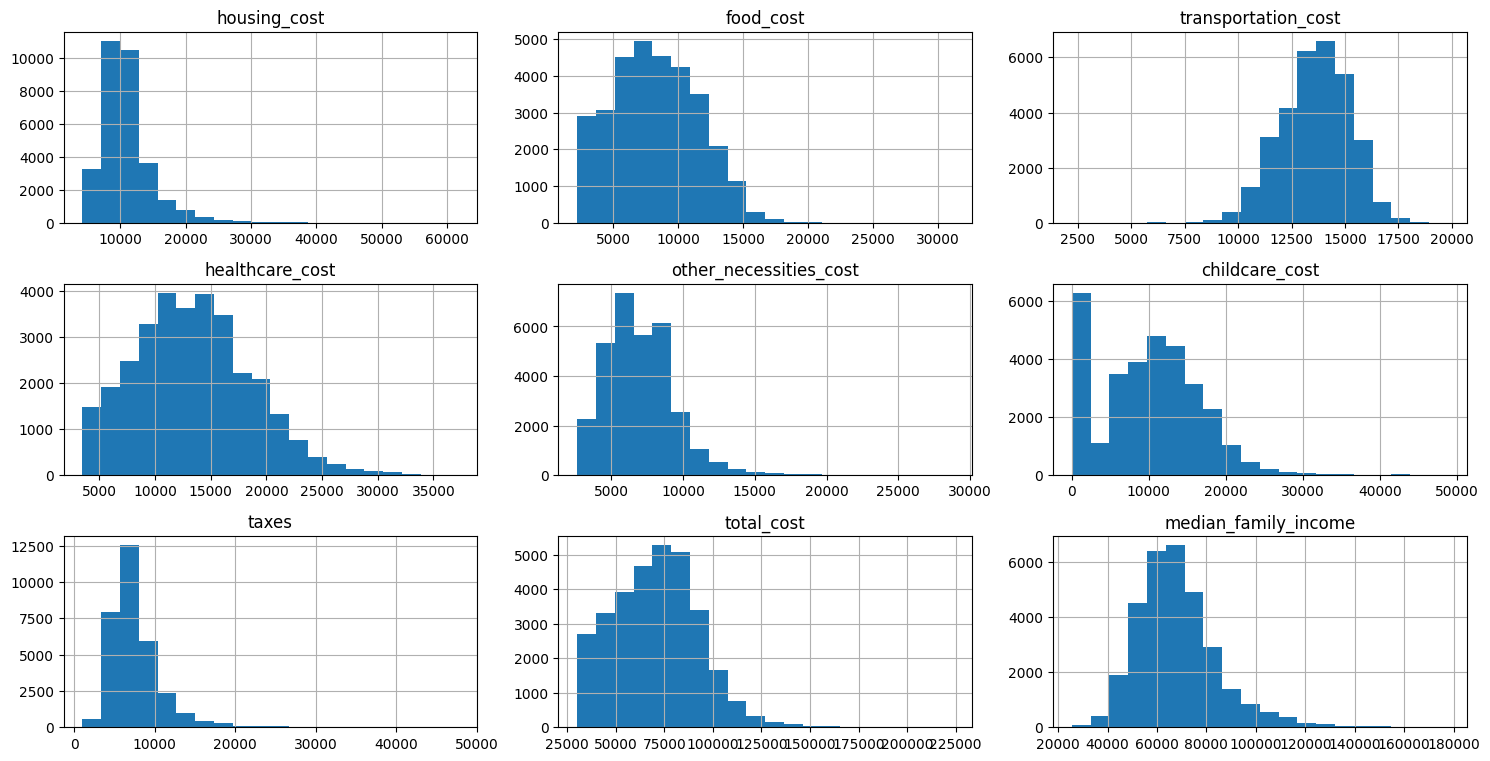

In [313]:
import matplotlib.pyplot as plt

# Filter out numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    data[column].hist(bins=20)
    plt.title(column)
    plt.tight_layout()

plt.show()


#Q.4 The 3 methods
- Correlation

In [314]:
# Calculate the correlation of all numeric columns with 'total_cost'
correlation_with_total_cost = data.corr(numeric_only=True)['total_cost']

# Exclude the correlation of 'total_cost' with itself
correlation_with_total_cost = correlation_with_total_cost.drop(labels=['total_cost'])

# Sort the correlation coefficients by their absolute values
correlation_with_total_cost = correlation_with_total_cost.abs().sort_values(ascending=False)

# Display the sorted correlation coefficients
print(correlation_with_total_cost)

other_necessities_cost    0.936292
food_cost                 0.894176
childcare_cost            0.880401
housing_cost              0.784998
taxes                     0.749285
healthcare_cost           0.748550
transportation_cost       0.634592
median_family_income      0.337168
isMetro                   0.196972
Name: total_cost, dtype: float64


Plotting correlation

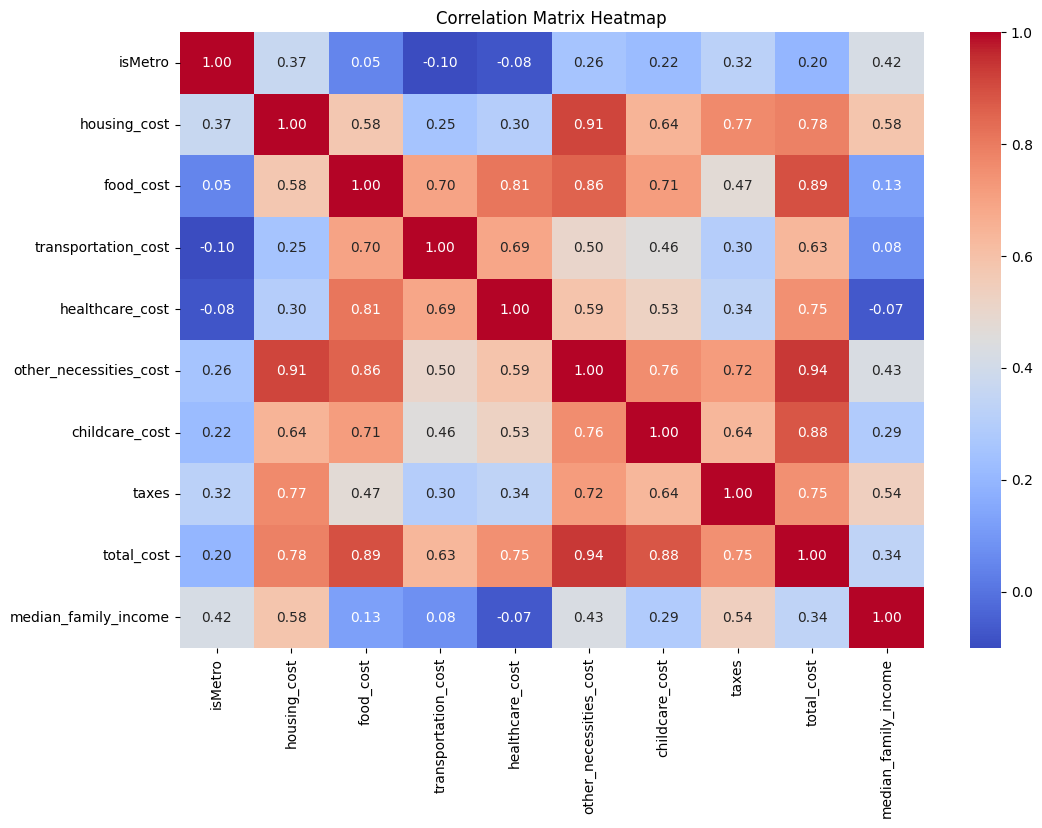

In [315]:
# Calculate the correlation matrix, specifying numeric_only=True
correlation_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

- 2nd method: Feature Importance

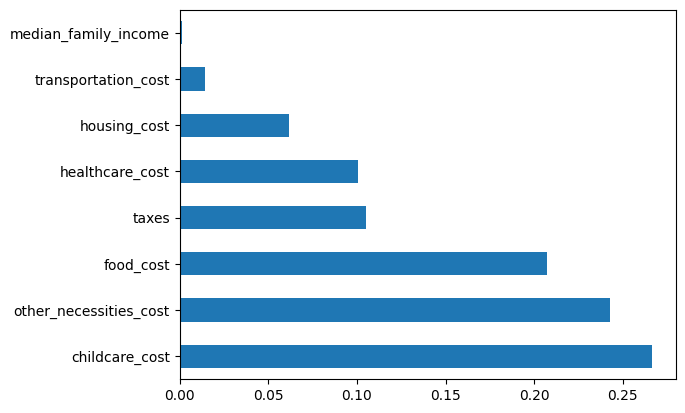

In [316]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

X = data.select_dtypes(include=[np.number]).drop('total_cost', axis=1)
y = data['total_cost']

# Impute missing values in X using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Fit the ExtraTreesRegressor model on the imputed data
model = ExtraTreesRegressor()
model.fit(X_imputed, y)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


-3 rd method


Which independent variables have missing data? How much?

In [317]:
# Checking for missing data in each column
missing_values = data.isnull().sum()

# Filtering to show only columns with missing data
missing_data_columns = missing_values[missing_values > 0]

missing_data_columns


median_family_income    10
dtype: int64

Tackling the missing values

In [318]:
# Calculate the mean of the median_family_income column
median_family_income_mean = data['median_family_income'].mean()

# Replace missing values in median_family_income with the mean
data['median_family_income'].fillna(median_family_income_mean, inplace=True)

# Check if there are any missing values left
missing_values_after = data['median_family_income'].isnull().sum()
print("Missing values in 'median_family_income' after filling:", missing_values_after)

Missing values in 'median_family_income' after filling: 0


In [319]:
data.isnull().sum()

state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

Do the training and test sets have the same data?

In [320]:
# Assuming 'data' is your DataFrame and 'total_cost' is your target variable
X = data.drop('total_cost', axis=1)
y = data['total_cost']

# Split the dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for any overlap in rows between the training and test sets
train_test_overlap = pd.merge(X_train, X_test, how='inner')

# Size of the overlap
overlap_size = train_test_overlap.shape[0]
print("Number of overlapping rows between training and test sets:", overlap_size)

# Checking if the training and test sets have the same data
# We do this by comparing the distributions of a few columns
train_describe = X_train.describe()
test_describe = X_test.describe()

train_describe, test_describe



Number of overlapping rows between training and test sets: 0


(       housing_cost     food_cost  transportation_cost  healthcare_cost  \
 count  25144.000000  25144.000000         25144.000000     25144.000000   
 mean   11063.921691   8283.159815         13592.282605     13396.680962   
 std     4157.702180   3269.549294          1640.565017      5220.684626   
 min     4209.311280   2220.276840          2216.461440      3476.379960   
 25%     8580.000000   5782.403280         12542.673300      9645.892110   
 50%    10424.900760   8129.156280         13692.193200     13083.951600   
 75%    12444.000000  10700.480760         14763.060900     16659.531600   
 max    61735.587600  31178.619600         19816.482000     37252.274400   
 
        other_necessities_cost  childcare_cost         taxes  \
 count            25144.000000    25144.000000  25144.000000   
 mean              7010.210625     9879.526465   7656.654303   
 std               2394.290320     6774.305882   3334.933725   
 min               2611.642080        0.000000   1209.7500

 In the predictor variables independent of all the other predictor variables?

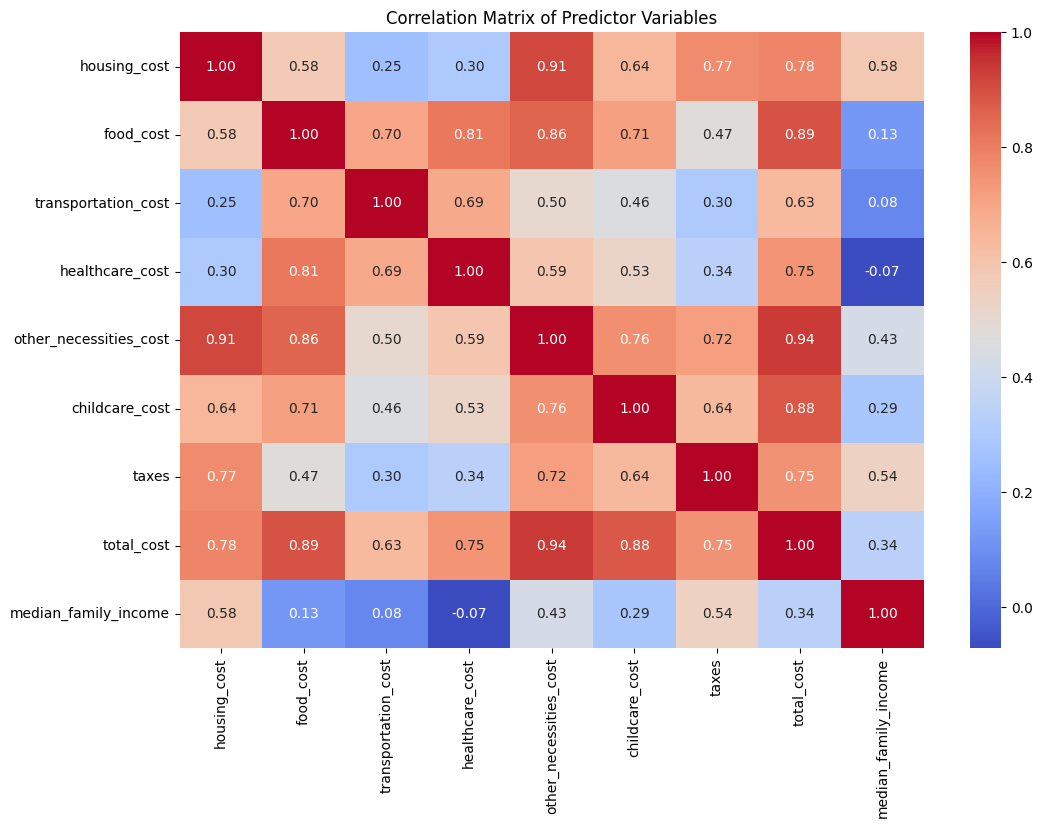

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_predictors = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_predictors.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictor Variables")
plt.show()


Which predictor variables are the most important?

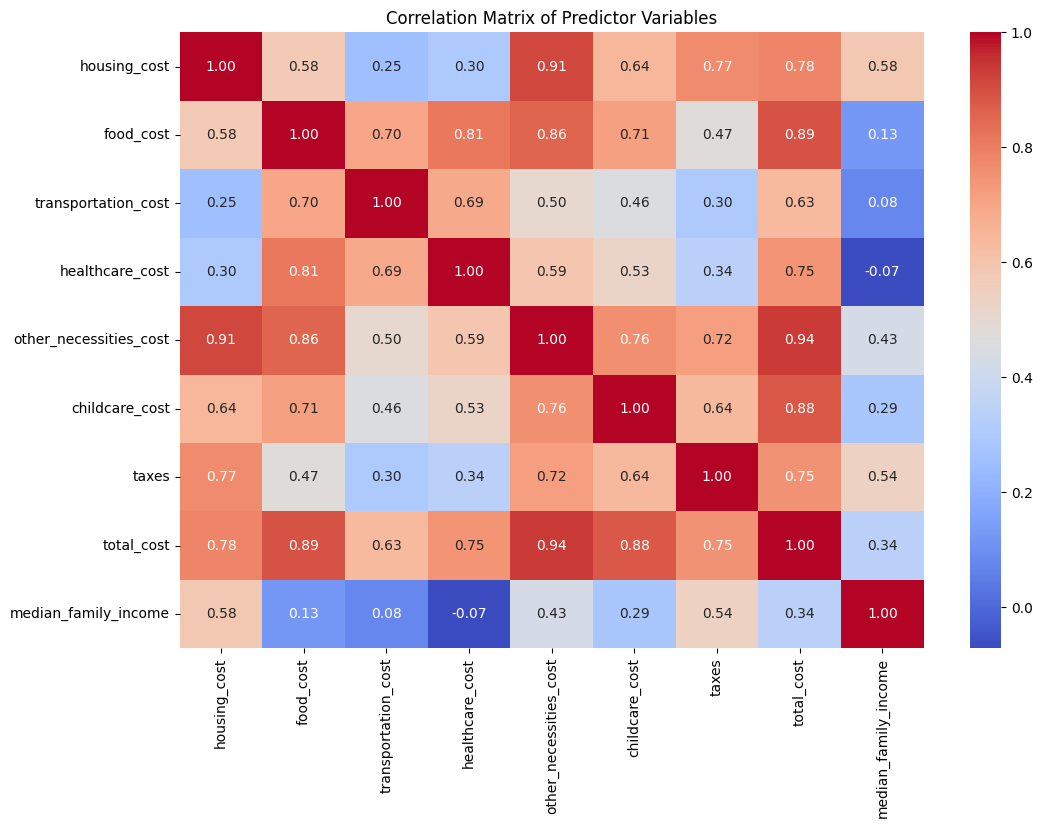

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_predictors = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_predictors.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictor Variables")
plt.show()


Which predictor variables are the most important?

In [323]:
# Calculate the correlation of all columns with 'total_cost', specifying numeric_only=True
correlation_with_target = data.corrwith(data['total_cost'], method='pearson', numeric_only=True)

# Sort the correlations by their absolute values in descending order
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Display the sorted correlation coefficients
print(sorted_correlation)


total_cost                1.000000
other_necessities_cost    0.936292
food_cost                 0.894176
childcare_cost            0.880401
housing_cost              0.784998
taxes                     0.749285
healthcare_cost           0.748550
transportation_cost       0.634592
median_family_income      0.337111
isMetro                   0.196972
dtype: float64


 Do the ranges of the predictor variables make sense?

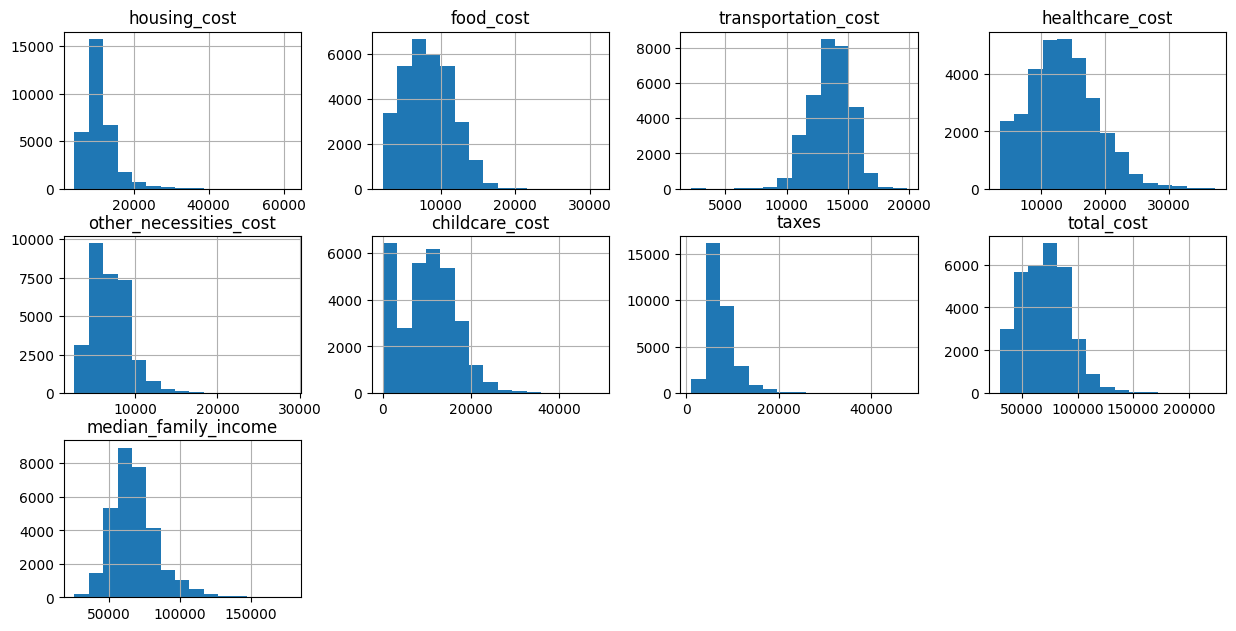

In [324]:
import matplotlib.pyplot as plt

# Plotting histograms for each predictor variable
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()


** What are the distributions of the predictor variables?   

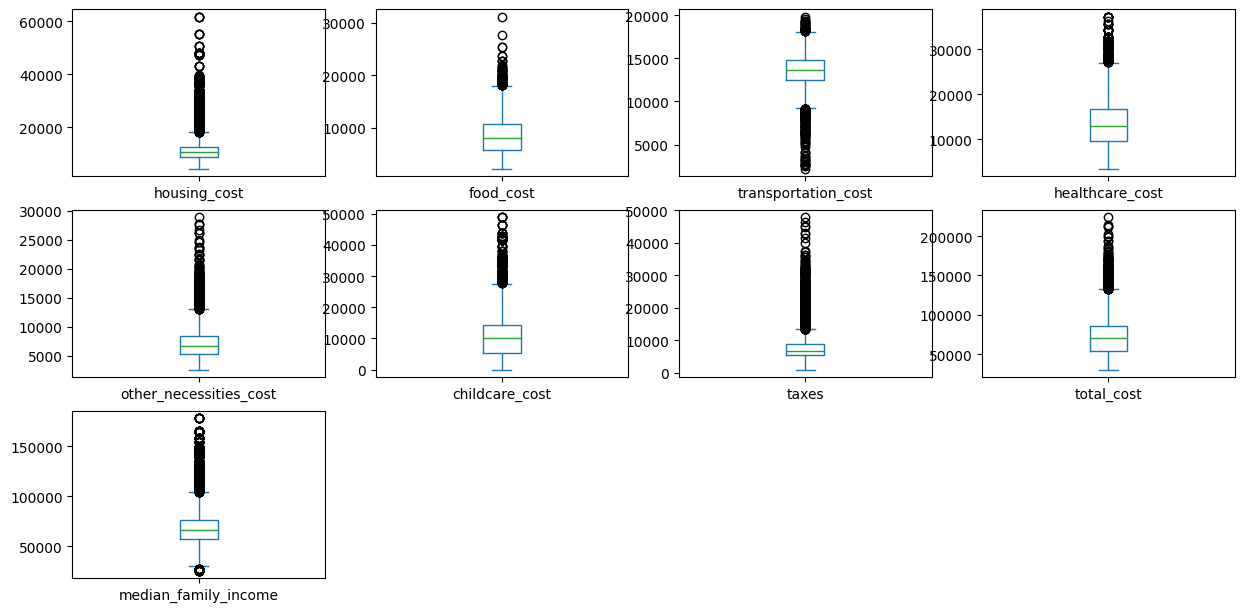

In [325]:
# Plot box plots for each predictor variable
data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.show()


With Outliers

In [326]:
import pandas as pd

without outliers

In [327]:
import pandas as pd

# Select only numeric columns for outlier detection
numeric_data = data.select_dtypes(include=[np.number])

# Calculate IQR for each numeric column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers by keeping only valid values
data_no_outliers = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]


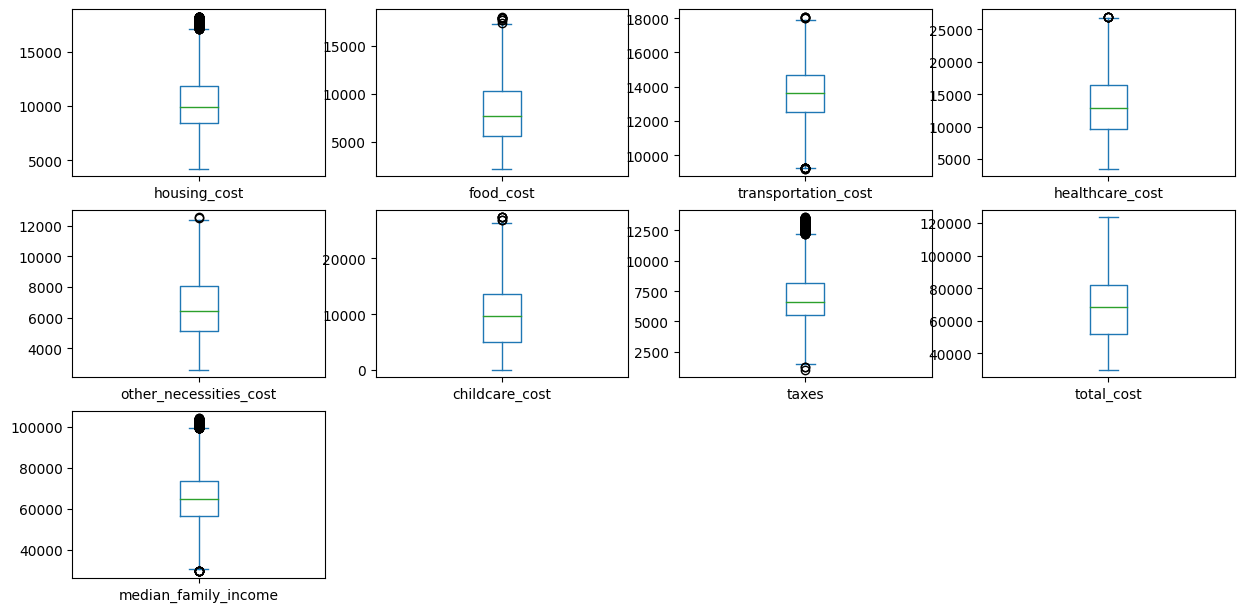

In [328]:
# Plot box plots for each predictor variable
data_no_outliers.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.show()

Checking mean & variance before removal of data and imputations

In [329]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate variance for each numeric feature
variance_original = numeric_data.var()
print("Variance of original dataset:\n", variance_original)

# Calculate mean for each numeric feature
mean_original = numeric_data.mean()
print("\nMean of original dataset:\n", mean_original)


Variance of original dataset:
 housing_cost              1.735227e+07
food_cost                 1.070036e+07
transportation_cost       2.691098e+06
healthcare_cost           2.708730e+07
other_necessities_cost    5.747601e+06
childcare_cost            4.594431e+07
taxes                     1.115423e+07
total_cost                4.772715e+08
median_family_income      2.850790e+08
dtype: float64

Mean of original dataset:
 housing_cost              11073.673539
food_cost                  8287.504557
transportation_cost       13593.856381
healthcare_cost           13394.031748
other_necessities_cost     7015.318377
childcare_cost             9879.584233
taxes                      7657.714782
total_cost                70901.683601
median_family_income      68315.997017
dtype: float64


Removal of random data 1%

In [330]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Identify numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Function to randomly remove 1% of data from numerical columns
def remove_data_randomly(df, percentage):
    df_removed = df.copy()
    for col in numeric_columns:
        n_missing = int(df.shape[0] * percentage)
        missing_indices = np.random.choice(df.index, n_missing, replace=False)
        df_removed.loc[missing_indices, col] = np.nan
    return df_removed

# Remove 1% of the data from numerical columns
data_removed = remove_data_randomly(data, 0.01)


Mean 1%

In [331]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed = data_removed.copy()
data_mean_imputed[numeric_columns] = mean_imputer.fit_transform(data_removed[numeric_columns])

# Calculate Mean Squared Error for Mean Imputation
mse_mean = mean_squared_error(data[numeric_columns].values, data_mean_imputed[numeric_columns].values)
print('Mean Imputation MSE:', mse_mean)


Mean Imputation MSE: 1024926.1723313401


In [332]:
def calculate_bias_variance(original, imputed, columns):
    # Calculate bias (mean of errors)
    bias = (imputed[columns] - original[columns]).mean()

    # Calculate variance
    variance = (imputed[columns] - original[columns]).var()

    return bias, variance

# Calculate bias and variance for mean imputation at 1%
bias_1, variance_1 = calculate_bias_variance(data, data_mean_imputed_1, numeric_columns)
print("Bias for 1% mean imputation:", bias_1)
print("Variance for 1% mean imputation:", variance_1)

Bias for 1% mean imputation: housing_cost                7.012537
food_cost                  -4.536750
transportation_cost         6.210627
healthcare_cost            -4.150615
other_necessities_cost      2.268872
childcare_cost             -5.309250
taxes                      -3.202423
total_cost                132.122487
median_family_income       29.128638
dtype: float64
Variance for 1% mean imputation: housing_cost              1.699250e+06
food_cost                 1.036245e+06
transportation_cost       2.825770e+05
healthcare_cost           2.624889e+06
other_necessities_cost    5.842595e+05
childcare_cost            4.576157e+06
taxes                     1.077307e+06
total_cost                4.647625e+07
median_family_income      2.898345e+07
dtype: float64


Median 1%

In [333]:
# Median Imputation
median_imputer = SimpleImputer(strategy='median')
data_median_imputed_1= data_removed.copy()
data_median_imputed[numeric_columns] = median_imputer.fit_transform(data_removed[numeric_columns])

# Calculate Mean Squared Error for Median Imputation
mse_median = mean_squared_error(data[numeric_columns].values, data_median_imputed[numeric_columns].values)
print('Median Imputation MSE:', mse_median)


Median Imputation MSE: 1036774.5622091173


Mode 1%

In [334]:
# Mode Imputation (most_frequent)
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode_imputed = data_removed.copy()
data_mode_imputed[numeric_columns] = mode_imputer.fit_transform(data_removed[numeric_columns])

# Calculate Mean Squared Error for Mode Imputation
mse_mode = mean_squared_error(data[numeric_columns].values, data_mode_imputed[numeric_columns].values)
print('Mode Imputation MSE:', mse_mode)


Mode Imputation MSE: 2497818.6973807383


In [335]:
file_path = "/content/cost_of_living_us.csv"
data = pd.read_csv(file_path)

Checking how well the recovered missing values

In [336]:
def remove_data_randomly(df, percentage):
    df_removed = df.copy()
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        n_missing = int(df.shape[0] * percentage)
        missing_indices = np.random.choice(df.index, n_missing, replace=False)
        df_removed.loc[missing_indices, col] = np.nan
    return df_removed


Removal of random data 5%

In [337]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


# Identify numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Function to randomly remove 5% of data from numerical columns
def remove_data_randomly(df, percentage):
    df_removed = df.copy()
    for col in numeric_columns:
        n_missing = int(df.shape[0] * percentage)
        missing_indices = np.random.choice(df.index, n_missing, replace=False)
        df_removed.loc[missing_indices, col] = np.nan
    return df_removed

# Remove 5% of the data from numerical columns
data_removed_5= remove_data_randomly(data, 0.05)


Mean 5%

In [338]:
# Assuming data_removed is the dataset with random data removal
numeric_columns = data_removed.select_dtypes(include=[np.number]).columns

mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed = data_removed.copy()
data_mean_imputed[numeric_columns] = mean_imputer.fit_transform(data_removed[numeric_columns])


# Mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Filter both original and imputed data to exclude originally missing entries
data_for_comparison_filtered = data_for_comparison[non_missing_mask]
data_mean_imputed_filtered = data_mean_imputed[non_missing_mask]

# Calculate Mean Squared Error for Mean Imputation
mse_mean = mean_squared_error(data_for_comparison_filtered.values, data_mean_imputed_filtered[numeric_columns].values)
print('Mean Imputation MSE:', mse_mean)


Mean Imputation MSE: 1025252.3741684923


In [339]:
def calculate_bias_variance(original, imputed, columns):
    # Calculate bias (mean of errors)
    bias = (imputed[columns] - original[columns]).mean()

    # Calculate variance
    variance = (imputed[columns] - original[columns]).var()

    return bias, variance

# Calculate bias and variance for mean imputation at 1%
bias_5, variance_5 = calculate_bias_variance(data, data_mean_imputed, numeric_columns)
print("Bias for 5% mean imputation:", bias_5)
print("Variance for 5% mean imputation:", variance_5)

Bias for 5% mean imputation: housing_cost               6.167428
food_cost                  0.344219
transportation_cost       -0.121060
healthcare_cost           -3.757858
other_necessities_cost     0.852182
childcare_cost             0.275510
taxes                      3.535632
total_cost                21.285410
median_family_income      -9.901041
dtype: float64
Variance for 5% mean imputation: housing_cost              1.385808e+05
food_cost                 1.032749e+05
transportation_cost       2.401715e+04
healthcare_cost           2.820089e+05
other_necessities_cost    4.780304e+04
childcare_cost            4.906230e+05
taxes                     1.243672e+05
total_cost                4.775072e+06
median_family_income      3.239296e+06
dtype: float64


Median 5%

In [340]:
median_imputer = SimpleImputer(strategy='median')
data_median_imputed = data_removed.copy()
data_median_imputed[numeric_columns] = median_imputer.fit_transform(data_removed[numeric_columns])


# Mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Filter both original and imputed data to exclude originally missing entries
data_for_comparison_filtered = data[numeric_columns][non_missing_mask]
data_median_imputed_filtered = data_median_imputed[non_missing_mask]

# Calculate Mean Squared Error for Median Imputation
mse_median = mean_squared_error(data_for_comparison_filtered.values, data_median_imputed_filtered[numeric_columns].values)
print('Median Imputation MSE:', mse_median)


Median Imputation MSE: 1037104.5350169496


Mode 5%

In [341]:
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode_imputed = data_removed.copy()
data_mode_imputed[numeric_columns] = mode_imputer.fit_transform(data_removed[numeric_columns])

# Mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Filter both original and imputed data to exclude originally missing entries
data_for_comparison_filtered = data[numeric_columns][non_missing_mask]
data_mode_imputed_filtered = data_mode_imputed[non_missing_mask]

# Calculate Mean Squared Error for Mode Imputation
mse_mode = mean_squared_error(data_for_comparison_filtered.values, data_mode_imputed_filtered[numeric_columns].values)
print('Mode Imputation MSE:', mse_mode)

Mode Imputation MSE: 2498613.6746873516


Removal of random data 10%

In [342]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


# Identify numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Function to randomly remove 10% of data from numerical columns
def remove_data_randomly(df, percentage):
    df_removed = df.copy()
    for col in numeric_columns:
        n_missing = int(df.shape[0] * percentage)
        missing_indices = np.random.choice(df.index, n_missing, replace=False)
        df_removed.loc[missing_indices, col] = np.nan
    return df_removed

# Remove 10% of the data from numerical columns
data_removed = remove_data_randomly(data, 0.10)


Mean 10%

In [343]:
mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed = data_removed.copy()
data_mean_imputed[numeric_columns] = mean_imputer.fit_transform(data_removed[numeric_columns])

# Create a mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Apply the mask to both the original and imputed datasets
data_original_filtered = data[numeric_columns][non_missing_mask]
data_mean_imputed_filtered = data_mean_imputed[non_missing_mask]

# Calculate Mean Squared Error for Mean Imputation
mse_mean = mean_squared_error(data_original_filtered.values, data_mean_imputed_filtered[numeric_columns].values)
print('Mean Imputation MSE:', mse_mean)



Mean Imputation MSE: 8912329.055082073


In [344]:
def calculate_bias_variance(original, imputed, columns):
    # Calculate bias (mean of errors)
    bias = (imputed[columns] - original[columns]).mean()

    # Calculate variance
    variance = (imputed[columns] - original[columns]).var()

    return bias, variance

# Calculate bias and variance for mean imputation at 1%
bias_10, variance_10 = calculate_bias_variance(data, data_mean_imputed, numeric_columns)
print("Bias for 10% mean imputation:", bias_10)
print("Variance for 10% mean imputation:", variance_10)


Bias for 10% mean imputation: case_id                   -0.294941
housing_cost               0.356573
food_cost                  3.857980
transportation_cost       -6.344708
healthcare_cost           -8.795825
other_necessities_cost    -0.822897
childcare_cost           -11.273985
taxes                      1.365400
total_cost               -50.531424
median_family_income      10.038553
dtype: float64
Variance for 10% mean imputation: case_id                   8.440161e+04
housing_cost              1.746952e+06
food_cost                 1.081268e+06
transportation_cost       2.646822e+05
healthcare_cost           2.604841e+06
other_necessities_cost    5.905327e+05
childcare_cost            4.438702e+06
taxes                     1.183849e+06
total_cost                4.766118e+07
median_family_income      2.946144e+07
dtype: float64


Median 10%

In [345]:
median_imputer = SimpleImputer(strategy='median')
data_median_imputed = data_removed.copy()
data_median_imputed[numeric_columns] = median_imputer.fit_transform(data_removed[numeric_columns])

# Mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Filter both original and imputed data to exclude originally missing entries
data_original_filtered = data[numeric_columns][non_missing_mask]
data_median_imputed_filtered = data_median_imputed[non_missing_mask]

# Calculate Mean Squared Error for Median Imputation
mse_median = mean_squared_error(data_original_filtered.values, data_median_imputed_filtered[numeric_columns].values)
print('Median Imputation MSE:', mse_median)


Median Imputation MSE: 8974890.93921672


Mode 10%

In [346]:
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode_imputed = data_removed.copy()
data_mode_imputed[numeric_columns] = mode_imputer.fit_transform(data_removed[numeric_columns])

# Mask for non-missing values in the original data
non_missing_mask = ~data[numeric_columns].isna().any(axis=1)

# Filter both original and imputed data to exclude originally missing entries
data_original_filtered = data[numeric_columns][non_missing_mask]
data_mode_imputed_filtered = data_mode_imputed[non_missing_mask]

# Calculate Mean Squared Error for Mode Imputation
mse_mode = mean_squared_error(data_original_filtered.values, data_mode_imputed_filtered[numeric_columns].values)
print('Mode Imputation MSE:', mse_mode)


Mode Imputation MSE: 23760109.150396906


For categorical data, calculate the accuracy and a confusion matrix.

In [347]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Preparing the data for logistic regression
# Selecting the target variable and predictors
target = 'isMetro'
predictors = ['state', 'family_member_count']

# One-hot encoding the categorical predictors
encoder = OneHotEncoder(sparse=False)
encoded_predictors = encoder.fit_transform(data[predictors])

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_predictors, data[target], test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(0.6768480220596034,
 array([[5184,  696],
        [2351, 1198]]))

MIT License

Copyright (c) 2024 Kotha-Nikhil

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.